In [1]:
 import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.layers import Input, Dense, LSTM, RNN, GRU, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam
from sklearn.preprocessing import StandardScaler

In [3]:
data=pd.read_csv("D://ML/Lazy_Programmer_GitHub/tf2.0/sbux.csv")

In [4]:
data.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX
1,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX
2,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX
3,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX
4,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX


In [5]:
data.tail()

,date,open,high,low,close,volume,Name
1254,2018-02-01,56.280,56.42,55.89,56.00,14690146,SBUX
1255,2018-02-02,55.900,56.32,55.70,55.77,15358909,SBUX
1256,2018-02-05,55.530,56.26,54.57,54.69,16059955,SBUX
1257,2018-02-06,53.685,56.06,53.56,55.61,17415065,SBUX
1258,2018-02-07,55.080,55.43,54.44,54.46,13927022,SBUX


## 1st approach(using only close price)

In [6]:
series=data['close'].values.reshape(-1,1)  #applying reshaping to xhange data into standard normal
series.shape

(1259, 1)

In [7]:
scaler=StandardScaler()
scaler.fit(series[:len(series)//2])  #approx between value is taken as boundary betweem test and train set
series=scaler.transform(series)
series

array([[-1.62500489],
       [-1.64174953],
       [-1.6330132 ],
       ...,
       [ 2.2342704 ],
       [ 2.36822751],
       [ 2.20078112]])

In [8]:
series=series.flatten() #flattening because we have to spit data into features and labels by splitting(take windows)
series

array([-1.62500489, -1.64174953, -1.6330132 , ...,  2.2342704 ,
        2.36822751,  2.20078112])

In [9]:
T=10
D=1
X=[]
Y=[]
for t in range(len(series)-T):
    x=series[t:t+T]
    X.append(x)
    y=series[t+T]
    Y.append(y)

X=np.array(X).reshape(-1, T, 1)
Y=np.array(Y)
N=len(X)
print(X.shape, Y.shape)

(1249, 10, 1) (1249,)


In [10]:
i=Input(shape=(T,1))
x=LSTM(5)(i)
x=Dense(1)(x)
model=Model(i,x)
model.compile(loss='mse',
             optimizer=Adam(lr=0.1))

In [11]:
r=model.fit(X[:-N//2], Y[:-N//2], epochs=10, validation_data=(X[-N//2:],Y[-N//2:]))

Train on 624 samples, validate on 625 samples
Epoch 1/10
624/624 [==============================] - 4s 7ms/sample - loss: 0.2861 - val_loss: 0.1892
Epoch 2/10
624/624 [==============================] - 0s 187us/sample - loss: 0.0152 - val_loss: 0.0597
Epoch 3/10
624/624 [==============================] - 0s 175us/sample - loss: 0.0089 - val_loss: 0.0400
Epoch 4/10
624/624 [==============================] - 0s 171us/sample - loss: 0.0066 - val_loss: 0.0347
Epoch 5/10
624/624 [==============================] - 0s 174us/sample - loss: 0.0059 - val_loss: 0.0337
Epoch 6/10
624/624 [==============================] - 0s 165us/sample - loss: 0.0064 - val_loss: 0.0406
Epoch 7/10
624/624 [==============================] - 0s 173us/sample - loss: 0.0060 - val_loss: 0.0443
Epoch 8/10
624/624 [==============================] - 0s 212us/sample - loss: 0.0060 - val_loss: 0.0321
Epoch 9/10
624/624 [==============================] - 0s 205us/sample - loss: 0.0064 - val_loss: 0.0557
Epoch 10/10
624/624 

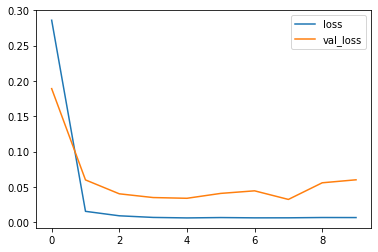

In [12]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

## 2nd approach(Using stock return)

In [6]:
#calculate return by shifting values by 1
data['PrevClose']=data['close'].shift(1)

In [7]:
data.head()

,date,open,high,low,close,volume,Name,PrevClose
0,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN
1,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185
2,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070
3,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130
4,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915


In [8]:
#calculate return as (x[t]-x[t-1]/x[t-1])
data['Return']=(data['close']-data['PrevClose'])/data['PrevClose']

In [9]:
data.head()

,date,open,high,low,close,volume,Name,PrevClose,Return
0,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN,NaN
1,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185,-0.004080
2,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070,0.002138
3,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130,-0.007643
4,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915,-0.005015


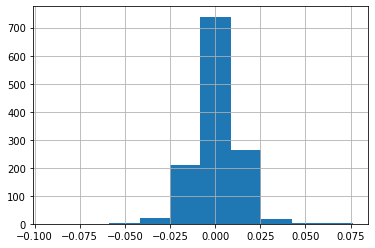

In [10]:
data['Return'].hist()

In [34]:
#Since values are so small so we will first normalize it before feeding into LSTM
series=data['Return'].values.reshape(-1,1)
series

array([[        nan],
       [-0.00408018],
       [ 0.00213751],
       ...,
       [-0.01936525],
       [ 0.01682209],
       [-0.02067973]])

In [35]:
scaler=StandardScaler()
scaler.fit(series[:len(series)//2])
series=scaler.transform(series).flatten()
series=series[1:len(series)]

In [36]:
series

array([-0.44082529,  0.07836923, -0.73833714, ..., -1.71716944,
        1.30457077, -1.82693238])

In [37]:
T=10
D=1
X=[]
Y=[]
for t in range(len(series)-T):
    x=series[t:t+T]
    X.append(x)
    y=series[t+T]
    Y.append(y)
X=np.array(X).reshape(-1,T,1)
Y=np.array(Y)
N=len(X)
print(X.shape, Y.shape)

(1248, 10, 1) (1248,)


In [14]:
i=Input(shape=(T,1))
x=LSTM(5)(i)
x=Dense(1)(x)
model=Model(i,x)
model.compile(loss='mse',
             optimizer=Adam(lr=0.01))

In [21]:
Y

array([-1.57995249,  0.00973242,  1.92162425, ..., -1.71716944,
        1.30457077, -1.82693238])

In [38]:
r=model.fit(X[:-N//2], Y[:-N//2], epochs=10, validation_data=(X[-N//2:],Y[-N//2:]))

Train on 624 samples, validate on 624 samples
Epoch 1/10
624/624 [==============================] - 0s 174us/sample - loss: nan - val_loss: nan
Epoch 2/10
624/624 [==============================] - 0s 146us/sample - loss: nan - val_loss: nan
Epoch 3/10
624/624 [==============================] - 0s 154us/sample - loss: nan - val_loss: nan
Epoch 4/10
624/624 [==============================] - 0s 154us/sample - loss: nan - val_loss: nan
Epoch 5/10
624/624 [==============================] - 0s 153us/sample - loss: nan - val_loss: nan
Epoch 6/10
624/624 [==============================] - 0s 150us/sample - loss: nan - val_loss: nan
Epoch 7/10
624/624 [==============================] - 0s 146us/sample - loss: nan - val_loss: nan
Epoch 8/10
624/624 [==============================] - 0s 155us/sample - loss: nan - val_loss: nan
Epoch 9/10
624/624 [==============================] - 0s 146us/sample - loss: nan - val_loss: nan
Epoch 10/10
624/624 [==============================] - 0s 148us/sample -

In [ ]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

In [ ]:
output=model.predict(X)
#print(output.shape)
pred=output[:,0]

plt.plot(Y, label='target')
plt.plot(pred, label='pred')
plt.legend()
plt.show()

In [ ]:
validation_target=Y[-N//2:]
validation_predictions=[]

last_x=X[-N//2]
while(len(validation_predictions)<len(validation_target)):
    pred=model.predict(last_x.reshape(1,-1,1))[0,0]
    validation_predictions.append(pred)
    
    last_x=np.roll(last_x,-1)
    last_x[-1]=pred
plt.plot(validation_target,label='validation_target')
plt.plot(validation_predictions,label='validation_predictions')
plt.legend()
plt.show()

## 3rd approach(Multiple input feature binary classifier)

In [40]:
input_data=data[['open', 'high', 'low', 'close', 'volume']].values
input_data.shape

(1259, 5)

In [41]:
targets=data['Return'].values
targets

array([        nan, -0.00408018,  0.00213751, ..., -0.01936525,
        0.01682209, -0.02067973])

In [67]:
T=10
D=input_data.shape[1]
N=len(input_data)
print(D,N)

5 1259


## Creating train set

In [68]:
Ntrain=len(input_data)*2//3
scaler=StandardScaler()
scaler.fit(input_data[:Ntrain+T])
input_data=scaler.transform(input_data)

In [69]:
X_train=np.zeros((Ntrain, T, D))
Y_train=np.zeros(Ntrain)

In [73]:
for t in range(Ntrain):
    X_train[t,:,:]=input_data[t:t+T]
    Y_train[t]=(targets[t+T]>0)

## Creating test set

In [76]:
X_test=np.zeros((N-Ntrain, T, D))
Y_test=np.zeros(N-Ntrain)

In [80]:
for t in range(N-Ntrain):
    X_test[t,:,:]=input_data[t:t+T]
    Y_test[t]=(targets[t+T]>0)

In [ ]:
i=Input(shape=(T,1))
x=LSTM(5)(i)
x=Dense(1)(x)
model=Model(i,x)
model.compile(loss='mse',
             optimizer=Adam(lr=0.01))

In [ ]:
r=model.fit(X[:-N//2], Y[:-N//2], epochs=10, validation_data=(X[-N//2:],Y[-N//2:]))

In [ ]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()
plt.show()